# Output

http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html

https://github.com/vlfeat/matconvnet/issues/1010

dilation rate: d

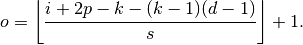

In [2]:
def cal_osize(i=0,p=0,k=0,d=1,s=1):
    '''
    i: input
    p: padding
    k: kernal_size
    d: dilation_rate
    s: stride
    '''
    return (i+2*p-k-(k-1)*(d-1))/s+1

### Conv2dTranspose

https://blog.csdn.net/qq_25964837/article/details/83652445

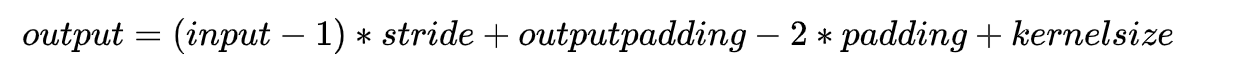

In [3]:
def cal_deconv_osize(i=0,p=0,k=0,d=1,s=1):
    '''
    i: input
    p: padding
    k: kernal_size
    #d: dilation_rate
    #op: outputpadding
    s: stride
    '''
    return (i-1)*s - 2*p +k#(i+2*p-k-(k-1)*(d-1))/s+1

### VGG-11

In [28]:
def vgg_11_size_cal(image_size):
    vgg_11_size_dict={}
    vgg_11_size_dict['image_input']=image_size
    vgg_11_size_dict['conv_1']=cal_osize(i=vgg_11_size_dict['image_input'],p=1,s=1,k=3)
    vgg_11_size_dict['maxpool_conv_1']=cal_osize(i=vgg_11_size_dict['conv_1'],k=2,s=2,p=0,d=1)
    vgg_11_size_dict['conv_2']=cal_osize(i=vgg_11_size_dict['maxpool_conv_1'],k=3,s=1,p=1)
    vgg_11_size_dict['maxpool_conv_2']=cal_osize(i=vgg_11_size_dict['conv_2'],k=2,s=2,p=0,d=1)
    vgg_11_size_dict['conv_3']=cal_osize(i=vgg_11_size_dict['maxpool_conv_2'],k=3,s=1,p=1)
    vgg_11_size_dict['conv_4']=cal_osize(i=vgg_11_size_dict['conv_3'],k=3,s=1,p=1)
    vgg_11_size_dict['maxpool_conv_4']=cal_osize(i=vgg_11_size_dict['conv_4'],k=2,s=2,p=0,d=1)
    vgg_11_size_dict['conv_5']=cal_osize(i=vgg_11_size_dict['maxpool_conv_4'],k=3,s=1,p=1)
    vgg_11_size_dict['conv_6']=cal_osize(i=vgg_11_size_dict['conv_5'],k=3,s=1,p=1)
    vgg_11_size_dict['maxpool_conv_6']=cal_osize(i=vgg_11_size_dict['conv_6'],k=2,s=2,p=0,d=1)
    vgg_11_size_dict['conv_7']=cal_osize(i=vgg_11_size_dict['maxpool_conv_6'],k=3,s=1,p=1)
    vgg_11_size_dict['conv_8']=cal_osize(i=vgg_11_size_dict['conv_7'],k=3,s=1,p=1)
    vgg_11_size_dict['maxpool_conv_8']=cal_osize(i=vgg_11_size_dict['conv_8'],k=2,s=2,p=0,d=1)

    vgg_11_size_dict['fc_input'] = vgg_11_size_dict['maxpool_conv_8']**2*512 # 512 channels
    return vgg_11_size_dict

In [35]:
vgg_11_size_cal(224)

{'image_input': 224,
 'conv_1': 224.0,
 'maxpool_conv_1': 112.0,
 'conv_2': 112.0,
 'maxpool_conv_2': 56.0,
 'conv_3': 56.0,
 'conv_4': 56.0,
 'maxpool_conv_4': 28.0,
 'conv_5': 28.0,
 'conv_6': 28.0,
 'maxpool_conv_6': 14.0,
 'conv_7': 14.0,
 'conv_8': 14.0,
 'maxpool_conv_8': 7.0,
 'fc_input': 25088.0}

In [4]:
cal_deconv_osize(i=7,p=0,k=2,s=2)

14

In [5]:
cal_deconv_osize(i=14,k=3,p=1,s=1)

14

In [9]:
def vgg_11_deconv_size_cal(feature_size):
    vgg_11_denconv_size_dict={}
    vgg_11_denconv_size_dict['feature_size']=feature_size
    vgg_11_denconv_size_dict['deconv_8']=cal_deconv_osize(i=vgg_11_denconv_size_dict['feature_size'],k=2,p=0,s=2)
    vgg_11_denconv_size_dict['deconv_7']=cal_deconv_osize(i=vgg_11_denconv_size_dict['deconv_8'],k=3,p=1,s=1)
    vgg_11_denconv_size_dict['deconv_6']=cal_deconv_osize(i=vgg_11_denconv_size_dict['deconv_7'],k=2,p=0,s=2)
    vgg_11_denconv_size_dict['deconv_5']=cal_deconv_osize(i=vgg_11_denconv_size_dict['deconv_6'],k=3,p=1,s=1)
    vgg_11_denconv_size_dict['deconv_4']=cal_deconv_osize(i=vgg_11_denconv_size_dict['deconv_5'],k=2,p=0,s=2)
    vgg_11_denconv_size_dict['deconv_3']=cal_deconv_osize(i=vgg_11_denconv_size_dict['deconv_4'],k=3,p=1,s=1)
    vgg_11_denconv_size_dict['deconv_2']=cal_deconv_osize(i=vgg_11_denconv_size_dict['deconv_3'],k=2,p=0,s=2)
    vgg_11_denconv_size_dict['deconv_1']=cal_deconv_osize(i=vgg_11_denconv_size_dict['deconv_2'],k=2,p=0,s=2)
    #vgg_11_denconv_size_dict['rec_image_size']=cal_deconv_osize(i=vgg_11_denconv_size_dict['deconv_1'],p=0,k=2,s=2)
    
    
    return vgg_11_denconv_size_dict

In [11]:
vgg_11_deconv_size_cal(3)

{'feature_size': 3,
 'deconv_8': 6,
 'deconv_7': 6,
 'deconv_6': 12,
 'deconv_5': 12,
 'deconv_4': 24,
 'deconv_3': 24,
 'deconv_2': 48,
 'deconv_1': 96}

why 4096 neurons?

For convlution layer, you can calculate the number of neurons, it is a certain number.

where does the 4096 number come from.

Is there some rule on How many features we need to use? 

In [33]:
vgg_11_size_cal(96)

{'image_input': 96,
 'conv_1': 96.0,
 'maxpool_conv_1': 48.0,
 'conv_2': 48.0,
 'maxpool_conv_2': 24.0,
 'conv_3': 24.0,
 'conv_4': 24.0,
 'maxpool_conv_4': 12.0,
 'conv_5': 12.0,
 'conv_6': 12.0,
 'maxpool_conv_6': 6.0,
 'conv_7': 6.0,
 'conv_8': 6.0,
 'maxpool_conv_8': 3.0,
 'fc_input': 4608.0}

In [34]:
224/96

2.3333333333333335

In [36]:
import argparse
parser = argparse.ArgumentParser(description='DL19_FinalProject_PyTorch')
parser.add_argument('--save', type=str, default='model.pt',
                    help='path to save the final model')

_StoreAction(option_strings=['--save'], dest='save', nargs=None, const=None, default='model.pt', type=<class 'str'>, choices=None, help='path to save the final model', metavar=None)

In [2]:
import sys

In [3]:
type(True)

bool

In [4]:
#https://stackoverflow.com/questions/15020200/python-how-to-send-output-to-both-file-and-terminal
# https://stackoverflow.com/questions/33178514/how-do-i-save-print-statements-when-running-a-program-in-slurm

message='Try'
sys.stdout.write(message)

Try

_ 是被当作一个变量的，平时只是为了方便，并不是真的把输出屏蔽掉

In [1]:
_=1

In [3]:
_1=2

In [4]:
_2 =3

In [5]:
del _,_1,_2

In [6]:
_


NameError: name '_' is not defined

In [7]:
_1

NameError: name '_1' is not defined